In [1]:
import nltk
#Data Preprocessing Package
import re
import numpy as np
import pandas as pd
import os
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
import re
import nltk
#from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import WordPunctTokenizer 
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
import re

In [2]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from nltk.tag import pos_tag
lemma = WordNetLemmatizer()

In [3]:

df=pd.read_excel('./data/전처리_1012.xlsx', 
                    usecols=['filelist','rawdata','cleaned'])
df.head()
#df=df[:50]


,filelist,rawdata,cleaned
0,1.samsung_electronic2021.txt,Samsung Electronics Sustainability Report 2021...,samsung journey future approach environment su...
1,101.Hyosung_Advanced_Materials_2020.txt,Sustainability\n\nwith Stakeholders\n2020 Hyos...,sustainability sustainability hyosung hamc sus...
2,103.meritz_securities_2019.txt,2019 SUSTAINABILITY REPORT\n\nMORE\nTHAN JUST\...,sustainability share company sustainability ye...
3,106.OCI_2020.txt,INTEGRATED REPORT 2020\n\nTRANSFORMING\nOPPORT...,introduction ceo message pdf web video clip pr...
4,107.sk_chemical_2020.txt,2020 SK chemicals Sustainability Report\n\nWe ...,future healthcare story health environment ear...


In [4]:
df

,filelist,rawdata,cleaned
0,1.samsung_electronic2021.txt,Samsung Electronics Sustainability Report 2021...,samsung journey future approach environment su...
1,101.Hyosung_Advanced_Materials_2020.txt,Sustainability\n\nwith Stakeholders\n2020 Hyos...,sustainability sustainability hyosung hamc sus...
2,103.meritz_securities_2019.txt,2019 SUSTAINABILITY REPORT\n\nMORE\nTHAN JUST\...,sustainability share company sustainability ye...
3,106.OCI_2020.txt,INTEGRATED REPORT 2020\n\nTRANSFORMING\nOPPORT...,introduction ceo message pdf web video clip pr...
4,107.sk_chemical_2020.txt,2020 SK chemicals Sustainability Report\n\nWe ...,future healthcare story health environment ear...
...,...,...,...
95,90.SAMSUNG_HEAVY_INDUSTRIES_2021.txt,SAMSUNG HEAVY INDUSTRIES\nSUSTAINABILITY REPOR...,samsung samsung overview sustainability share ...
96,92.gs E_C_2021.txt,Grow with\nGreen Sustainability\nGS E&C Integr...,grow sustainability business company value gov...
97,93.kogas_2021.txt,"BETTER ENERGY,\nBETTER WORLD\nESG REPORT 2021\...",energy world kogas kogas energy company knowho...
98,94.CJ Logistics_2020.txt,_x000C_ABOUT THIS REPORT\n\nSummary\n\nCJ Logi...,sustainability management year sustainability ...


In [9]:
# directory = '/Users/kangjiwon/Downloads/important_code/TXT_convert/' #제 폴더니까 다시 바꾸세요~
# filelist = os.listdir(directory)
# df=pd.DataFrame(columns=['filelist','rawdata'])
# df['filelist']=filelist


In [10]:
# for i in range(len(df)):
#     j = df['filelist'][i]
#     filename = directory + j
#     f=open(filename, 'r', encoding='unicode_escape')
#     txt = f.read()
#     f.close()
#     df['rawdata'][i] = txt

# df

In [5]:
len(df)

100

In [6]:
#수정버전!!!

stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(set(stop_words).union(set(sklearn_stop_words)))
tokenizer=WordPunctTokenizer()
lemma = WordNetLemmatizer()
remove_bracket=['step','report','reporting']
stop_words.extend(remove_bracket)#
len(stop_words)
def prepro(text):

    a=text.lower()
    a=re.sub('\n',' ',a)
    a=re.sub('\r',' ',a)
    a=re.sub('\t',' ',a)
    a=re.sub('x0002','',a)
    b = re.sub('[^a-zA-Z ]','',a).strip()

    tagged_list = pos_tag(tokenizer.tokenize(b))
    ad_and_nouns = [t[0] for t in tagged_list if (t[1] == "NN")or(t[1]=="NNP")]
    e_list= [lemma.lemmatize(i) for i in ad_and_nouns]
    result=[w for w in e_list if (w not in stop_words) and  (len(w) > 2)]
    # remove single character

    return result

In [13]:
'''
stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(set(stop_words).union(set(sklearn_stop_words)))
tokenizer=TreebankWordTokenizer()
lemma = WordNetLemmatizer()

remove_bracket=['[',']','step']
stop_words.extend(remove_bracket)
len(stop_words)

def prepro(text):
    a=text.lower()
    b=re.sub(pattern,'',a)
    b=re.sub(r'\[\[(?:[^\]|]*\|)?([^\]|]*)\]\]', '', b)
    c=re.sub('\n',' ',b)
    tagged_list = pos_tag(tokenizer.tokenize(c))
    ad_and_nouns = [t[0] for t in tagged_list if (t[1] == "NN")or(t[1]=="NNP") or(t[1]=='JJ')]
    e_list= [lemma.lemmatize(i) for i in ad_and_nouns]
    result=[w for w in e_list if w not in stop_words]
#     for w in e_list: 
#         if w not in stop_words: 
#             result.append(w)
    return result
    
'''


'\nstop_words=nltk.corpus.stopwords.words(\'english\')\nstop_words=list(set(stop_words).union(set(sklearn_stop_words)))\ntokenizer=TreebankWordTokenizer()\nlemma = WordNetLemmatizer()\n\nremove_bracket=[\'[\',\']\',\'step\']\nstop_words.extend(remove_bracket)\nlen(stop_words)\n\ndef prepro(text):\n    a=text.lower()\n    b=re.sub(pattern,\'\',a)\n    b=re.sub(r\'\\[\\[(?:[^\\]|]*\\|)?([^\\]|]*)\\]\\]\', \'\', b)\n    c=re.sub(\'\n\',\' \',b)\n    tagged_list = pos_tag(tokenizer.tokenize(c))\n    ad_and_nouns = [t[0] for t in tagged_list if (t[1] == "NN")or(t[1]=="NNP") or(t[1]==\'JJ\')]\n    e_list= [lemma.lemmatize(i) for i in ad_and_nouns]\n    result=[w for w in e_list if w not in stop_words]\n#     for w in e_list: \n#         if w not in stop_words: \n#             result.append(w)\n    return result\n    \n'

In [ ]:
raw=list(df['cleaned'])

cleaned=[' '. join(prepro(i)) for i in raw]


In [7]:
cleaned = df['cleaned']

In [8]:
cleaned[10]

'bgf sustainability overview description materiality analysis performance progress achievement management publication sustainability disclosure communication management performance scope focus bgf management performance management performance company performance information kirfs case restriction collection scope information annotation period period line year performance performance performance end basis reference area factbook impact erformance business philosophy planet value chain ceo message management brand introduction greenhouse gas business issue product usage management aste reduction expansion management protection management materiality analysis stakeholder governance partner establishment growth ecosystem risk management growth management safety net community development contribution support standard core option iso sustainability development sdgs life thirdparty assurance customer information reliability writing process information assurance assurance institution gwp work 

In [77]:
df['cleaned_ceo'] =cleaned

문서의 최대 길이 : 32767
문서의 평균 길이 : 32369.48


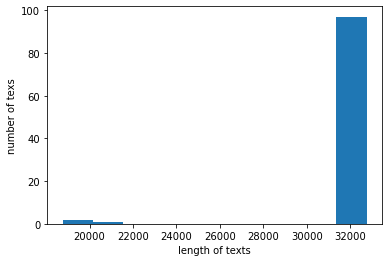

In [9]:
# 문장의 길이 분포 확인
import matplotlib.pyplot as plt

print('문서의 최대 길이 :',max(len(l) for l in cleaned))
print('문서의 평균 길이 :',sum(map(len, cleaned))/len(cleaned))
plt.hist([len(s) for s in cleaned], bins=10)
plt.xlabel('length of texts')
plt.ylabel('number of texs')
plt.show()

In [17]:
# import pickle
# df.to_pickle('전처리.pickle')

In [18]:
#df.to_excel('전처리.xlsx')

## word2vec

In [ ]:


import gensim
from gensim.models import KeyedVectors

DIM=100          #차원수
WINDOW_SIZE=10   #학습되는 주변단어 수
EPOCH =200       #반복학습 횟수

text = [i.strip().split() for i in df['cleaned'].tolist()]

#word2vec model create
model = gensim.models.Word2Vec(text, vector_size = DIM,
                            min_count=10, window = WINDOW_SIZE,  #min_count는 빈도기준 학습제외
                            sg=1,epochs = EPOCH)     #sg=1 은 skip_gram, sg=0은 bag-of-bow

model.wv.save("word2vec_1016_2.bin")


In [17]:

# 저장한 모델 다시 load
wv = KeyedVectors.load("word2vec_1016.bin", mmap='r')


vector = wv['environment']  # Get numpy vector of a word

print(vector)


[-0.01979035 -0.2022822   0.0154109  -0.21128556  0.00128701 -0.16822506
  0.12666264 -0.01639372  0.18871893 -0.01215224 -0.20061935  0.04357682
  0.23121369  0.07473302  0.12774846 -0.20908229 -0.04306388 -0.3519156
  0.04376911  0.00736799 -0.16694109 -0.1598649  -0.16426274 -0.10390685
 -0.0959886  -0.2415166   0.00513909  0.12590948  0.15344773 -0.11523854
  0.23818558 -0.02642084 -0.10162222 -0.13731527 -0.04817465 -0.06704307
  0.06347515  0.00872978  0.14785022 -0.11522189 -0.26825705 -0.28574812
 -0.19856626  0.16521484 -0.09270272  0.11443879 -0.14445966 -0.03873289
  0.04151031  0.06834382 -0.21484028 -0.00323423 -0.03482936  0.16957477
  0.12565735  0.14952374  0.01906773 -0.04009636 -0.09396315 -0.0249883
 -0.08467843 -0.00147022  0.12289436 -0.07241032 -0.00387341 -0.07797681
 -0.13300447  0.00601782 -0.28419524  0.44789362  0.01725108 -0.01069722
 -0.00696684  0.14875384  0.11208578  0.03191044 -0.23211494  0.03986013
 -0.26329327 -0.41158542  0.15790513  0.15052412 -0.0

In [21]:
model_result= wv.most_similar('environment')
print(model_result)

[('safety', 0.735852062702179), ('management', 0.7107547521591187), ('society', 0.6941480040550232), ('workplace', 0.6643203496932983), ('health', 0.6430657505989075), ('responsibility', 0.6110721826553345), ('change', 0.5999689698219299), ('sustainability', 0.593680202960968), ('community', 0.5885955095291138), ('business', 0.5840747952461243)]


In [31]:
model

In [33]:
model = KeyedVectors.load("word2vec_1016.bin", mmap='r')

In [ ]:
#시각적으로 결과 확인

from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

#2 차원 시각화
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # numpy arrays로 단어와 벡터 추출
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # t-SNE으로 차원 축소
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    
    # randomly subsampled 25 data points로 표시
    
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)